<a href="https://colab.research.google.com/github/smvjk/Complex_Networks_-Erdos_Renyi-_Erdos_Renyi_Gilbert-_Watts_and_Strogatz_model-/blob/main/Complex_Networks_(Erd%C3%B6s_R%C3%A8nyi%2C_Erd%C3%B6s_R%C3%A8nyi_Gilbert%2C_Watts_and_Strogatz_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complex Networks (Erdös-Rènyi, Erdös-Rènyi-Gilbert, Watts and Strogatz model)

## Introduction
Complex network analysis has come to be an important field of study that covers many academic fields and
gives insides on the complex structures that foundation connected systems. Firstly we take a look at
visualizing chosen datasets (in this report I presented only one) by drawing it as a network. In the second
section, we concentrate on the Stanford Large Network Dataset Collection, including the extraction and
analysis of the Facebook social circles network (ego-Facebook). Calculating critical network parameters
such as degree distribution, clustering coefficients, and shortest path statistics are part of the evaluation.
The study also explores the construction and analysis of random graphs using important models in the area.
Three distinct models of network creation are examined: Watts and Strogatz (WS(N, k, β)), Erdös-RényiGilbert (G(N, p)), and Erdös-Rényi (G(N, L)). By creating arbitrary connections between vertices, the ErdösRényi models highlight the significance of edge density (L or p). On the other hand, the Watts and Strogatz
model combines regularity and randomness, affecting the network topology through factors such as the
rewiring probability (β) and starting degree (k).
To compare and contrast these models, we examine properties such as degree distribution, clustering
coefficients, and shortest path statistics. The importance of parameter values for insightful model
comparisons is covered in the study. The obtained networks, the procedures used to compute in the Facebook
social circles network, and the findings regarding degree distribution, clustering coefficients, and shortest
path attributes are all displayed in the sections that follow. We also develop and analyse a Python version of
one of the random network models, giving a thorough rundown of its features.


## Downloading the chosen data set and drawing it as a network.

Retweet Networks for Twitter Hashtag #voteonedirection. Source: https://networkrepository.com/rt.php (access 22.12.2023)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving rt_voteonedirection.edges to rt_voteonedirection.edges


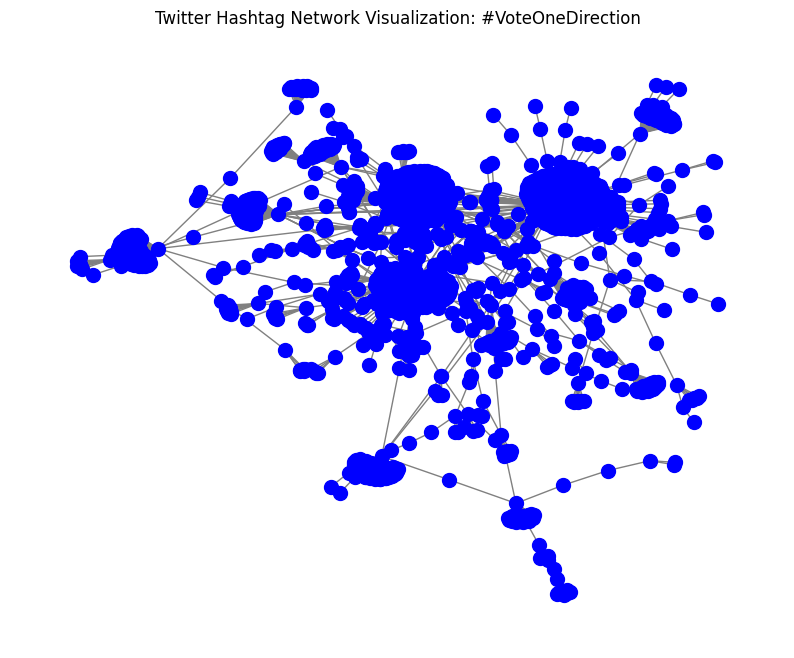

In [ ]:
file_path = list(uploaded.keys())[0]

# Read the edge list from the uploaded file
G = nx.read_edgelist(file_path, delimiter=',', data=(('timestamp', int),))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, font_size=6, node_size=100, node_color='blue', edge_color='gray', ax=ax)
plt.title("Twitter Hashtag Network Visualization: #VoteOneDirection")
plt.show()

## Network of dataset “Social Circles from Facebook”.

Facebook Social Network. Source of the dataset. Source: https://snap.stanford.edu/data/index.html#socnets (access 22.12.2023)


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving facebook_combined.txt to facebook_combined.txt


In [ ]:
def read_edge_list(file_path):
    """Read the edge list from the specified file."""
    edges = []
    with open(file_path, 'r') as file:
        for line in file:
            source, target = map(int, line.strip().split())
            edges.append((source, target))
    return edges

In [ ]:
def calculate_degree_distribution_and_average_degree(edges, N):
    """Calculate degree distribution P(k) and average degree <k>."""
    degrees = np.zeros(N, dtype=int)
    for edge in edges:
        degrees[edge[0]] += 1
        degrees[edge[1]] += 1
    degree_distribution = np.bincount(degrees) / N
    average_degree = np.mean(degrees)
    return degree_distribution, average_degree, degrees

In [ ]:
def calculate_clustering_coefficients(edges, N, degrees):
    """Calculate clustering coefficients and average clustering coefficient."""
    clustering_coeffs = np.zeros(N, dtype=float)
    for edge in edges:
        clustering_coeffs[edge[0]] += 1
        clustering_coeffs[edge[1]] += 1
    for i in range(N):
        k_i = degrees[i]
        clustering_coeffs[i] = clustering_coeffs[i] / (k_i * (k_i - 1)) if k_i > 1 else 0

    avg_clustering_coeff = np.mean(clustering_coeffs)
    return clustering_coeffs, avg_clustering_coeff

In [ ]:
def calculate_shortest_paths_statistics(edges, N):
    """Calculate shortest paths distribution, diameter, and average path length."""
    G = nx.Graph(edges)
    shortest_paths = nx.shortest_path_length(G)
    all_shortest_paths = [length for source_paths in shortest_paths for length in source_paths[1].values()]
    diameter = nx.diameter(G)
    average_path_length = nx.average_shortest_path_length(G)
    return all_shortest_paths, diameter, average_path_length

In [ ]:
# Assuming the uploaded file is the only one and its key can be retrieved
file_path = list(uploaded.keys())[0]

# Read the edge list
edges = read_edge_list(file_path)

# Number of nodes
N = np.max(edges) + 1

### (a) Degree distribution P(k) and average degree < k >

(a) Degree distribution P(k) and average degree <k>:
Degree Distribution P(k): [0.         0.01856895 0.02426343 ... 0.         0.         0.00024759]
Average Degree <k>: 43.69101262688784



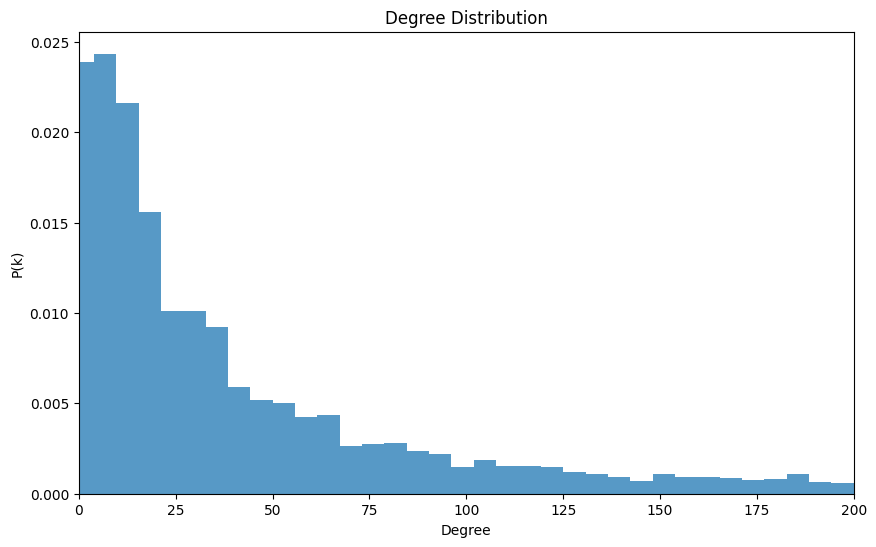

In [ ]:
# (a) Degree distribution P(k) and average degree <k>
degree_distribution, avg_degree, degrees = calculate_degree_distribution_and_average_degree(edges, N)
print("(a) Degree distribution P(k) and average degree <k>:")
print(f"Degree Distribution P(k): {degree_distribution}")
print(f"Average Degree <k>: {avg_degree}\n")

# Plot histogram for degree distribution with specific bins
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins='auto', align='left', density=True, alpha=0.75)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("P(k)")
plt.xlim(0, 200)
plt.show()

The analysis begins by reading the edge list from the specified file, where each line corresponds to an edge
between two nodes in the Facebook Social Circles network. Node degrees are then calculated by counting
the number of edges incident to each node. The degree distribution P(ki) is determined, representing the
fraction of nodes with a specific degree ki out of the total number of nodes N. The average degree ⟨k⟩ is
computed as the mean of all individual node degrees.

### (b) Distribution of clustering coefficients and average clustering coefficient

(b) Distribution of clustering coefficients and average clustering coefficient:
Clustering Coefficients: [0.00289017 0.0625     0.11111111 ... 1.         0.33333333 0.125     ]
Average Clustering Coefficient: 0.09532315876774604



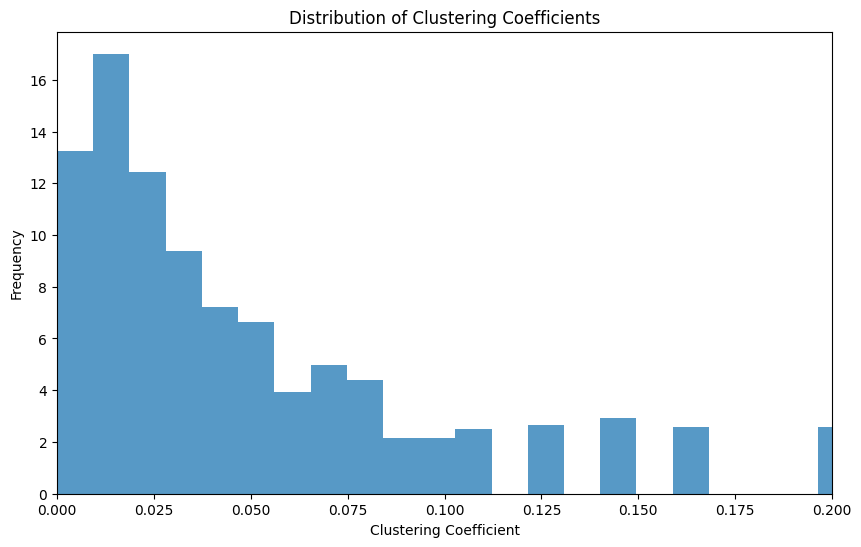

In [ ]:
# (b) Distribution of clustering coefficients and average clustering coefficient
clustering_coeffs, avg_clustering_coeff = calculate_clustering_coefficients(edges, N, degrees)
print("(b) Distribution of clustering coefficients and average clustering coefficient:")
print(f"Clustering Coefficients: {clustering_coeffs}")
print(f"Average Clustering Coefficient: {avg_clustering_coeff}\n")

# Histogram for clustering coefficients
plt.figure(figsize=(10, 6))
plt.hist(clustering_coeffs, bins='auto', density=True, alpha=0.75)
plt.title("Distribution of Clustering Coefficients")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.xlim(0, 0.2)
plt.show()

The computation of clustering coefficients involves the application of a formula for each node, specifically
𝐶𝑖 =
(𝐴
^3
)_𝑖𝑖/(
𝑘𝑖
(𝑘𝑖−1))
, where A is the adjacency matrix, and ki
is the degree of node i. The resulting clustering
coefficients for individual nodes provide insights into the local clustering patterns. The average clustering
coefficient ⟨C_i⟩ is then determined by calculating the mean of all individual clustering coefficients.

### (c) Distribution of shortest paths, diameter, and average path length

(c) Distribution of shortest paths, diameter, and average path length:
Diameter: 8
Average Path Length: 3.6925068496963913


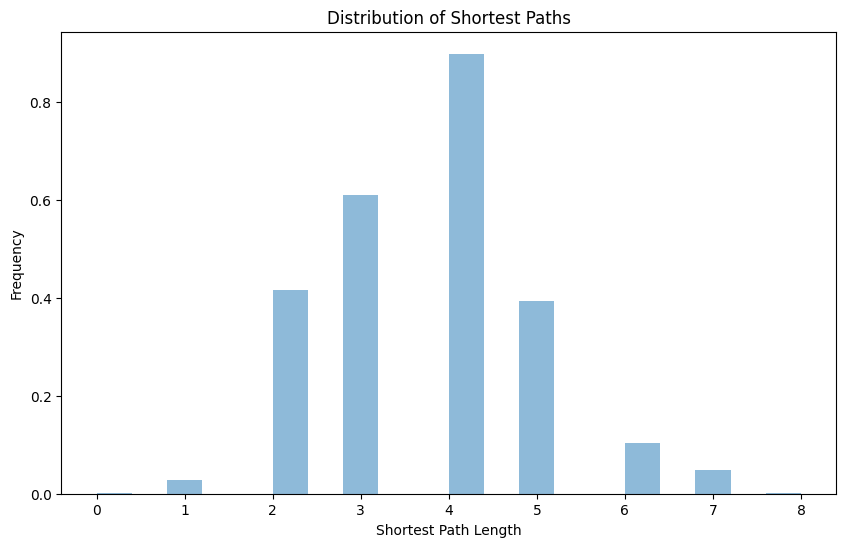

In [ ]:
# (c) Distribution of shortest paths, diameter, and average path length
shortest_paths, diameter, avg_path_length = calculate_shortest_paths_statistics(edges, N)
print("(c) Distribution of shortest paths, diameter, and average path length:")
print(f"Diameter: {diameter}")
print(f"Average Path Length: {avg_path_length}")

# Histogram for shortest paths
plt.figure(figsize=(10, 6))
plt.hist(shortest_paths, bins=20, density=True, alpha=0.5, align='mid')
plt.title("Distribution of Shortest Paths")
plt.xlabel("Shortest Path Length")
plt.ylabel("Frequency")
plt.show()

To analyze the network's path characteristics, a graph is created using the obtained edge list. The shortest
paths between all pairs of nodes are computed using the NetworkX library. The distribution of shortest paths
is obtained by collecting the lengths of these paths, providing insights into the overall path lengths in the
network. Additionally, the diameter, representing the maximum shortest path length, is determined. The
average path length is calculated as the mean of all computed shortest path lengths.

## Creating the following random graphs.

### Erdös-Rènyi model


The Erdős-Rényi model, proposed by mathematicians Paul Erdős and Alfréd Rényi, is a classic random
graph model that describes the formation of networks through a stochastic process. In this model, random
networks with a variety of structures are created when nodes are joined by edges with a fixed probability.
The number of nodes, N, and the probability of edge generation, p, are the two factors that define the model.
It has proven to be a useful tool in the investigation of phase transitions in graph properties, giving important
new perspectives on the formation of connection, component sizes, and other essential features in intricate
networks. For an understanding of random graph properties and the stochastic nature of network formation,
the Erdős-Rényi model is still a fundamental tool.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
def erdos_renyi_model(N, L):
    if L > (N * (N - 1)) // 2:
        raise ValueError("The number of edges (L) cannot exceed the maximum possible number of edges.")
    G = nx.Graph()
    G.add_nodes_from(range(N))
    edges = set()
    while len(edges) < L:
        edge = tuple(np.random.choice(N, size=2, replace=False))
        if edge not in edges:
            edges.add(edge)
    G.add_edges_from(edges)
    return G

def calculate_and_plot_properties(G):

    # (a) Degree distribution P(k) and average degree <k>
    degrees = [deg for _, deg in G.degree()]
    degree_distribution = np.bincount(degrees) / G.number_of_nodes()
    average_degree = np.mean(degrees)
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 3, 1)
    plt.hist(degrees, bins='auto', density=True, alpha=0.75)
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("P(k)")
    print(f"Average degree <k>: {average_degree}")

    # (b) Distribution of clustering coefficients and average clustering coefficient
    clustering_coeffs = nx.clustering(G)
    avg_clustering_coeff = np.mean(list(clustering_coeffs.values()))
    plt.subplot(1, 3, 2)
    plt.hist(list(clustering_coeffs.values()), bins='auto', density=True, alpha=0.75)
    plt.title("Distribution of Clustering Coefficients")
    plt.xlabel("Clustering Coefficient")
    plt.ylabel("Frequency")
    plt.show()
    print(f"Average clustering coefficient: {avg_clustering_coeff}")

In [ ]:
# Parameters for the Erdos-Renyi model
N = 100  # Number of nodes
L = 300  # Number of edges

Average degree <k>: 5.96


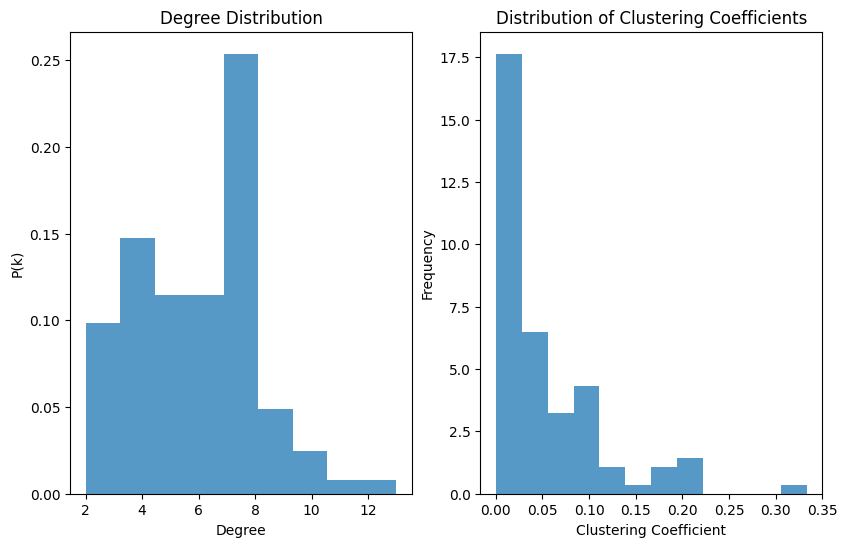

Average clustering coefficient: 0.04686779886779886


In [ ]:
# Generate Erdos-Renyi model graph
erdos_renyi_graph = erdos_renyi_model(N, L)

# Calculate and plot properties
calculate_and_plot_properties(erdos_renyi_graph)

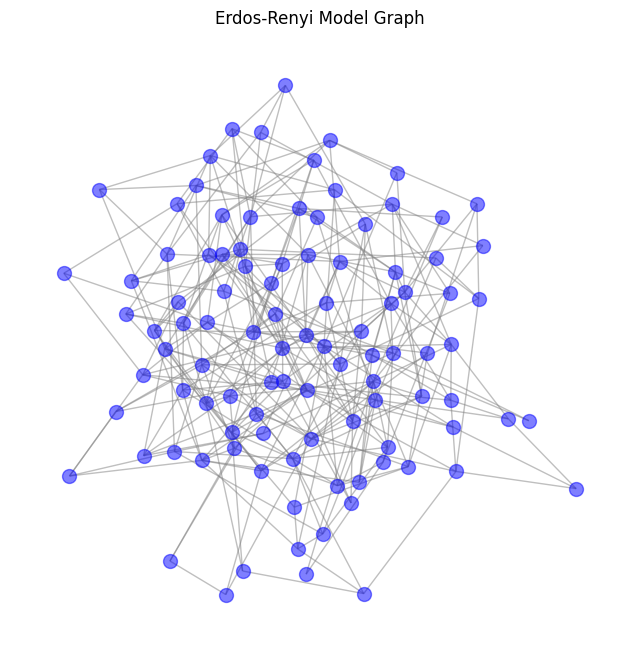

In [ ]:
# Plot the network graph
plt.figure(figsize=(8, 8))
plt.title("Erdos-Renyi Model Graph")
pos = nx.spring_layout(erdos_renyi_graph)  # Adjust layout if needed
nx.draw(erdos_renyi_graph, pos, with_labels=False, font_size=6, node_size=100,
        node_color='blue', edge_color='gray', alpha=0.5)
plt.show()

### Erdös-Rènyi-Gilbert model

The Erdős-Rényi-Gilbert model, an extension of the Erdős-Rényi model, introduces a probabilistic approach
to the formation of edges between nodes in a random graph. Proposed as an alternative by mathematicians
Paul Erdős and Alfréd Rényi, the model defines a network where each pair of nodes, denoted as (i, j), has a
connection (an edge) with an independently assigned probability, p.
The stochastic aspect of network development is captured more broadly by the Erdős-Rényi-Gilbert model,
which provides for a more nuanced portrayal of connection as opposed to the fixed edge probability of the
Erdős-Rényi model. Insights into the formation of intricate connectivity patterns and a deeper understanding
of random graph dynamics can be gained by using this model to investigate the effects of different
connection probabilities on network topologies and attributes.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
def erdos_renyi_gilbert_graph(N, p):
    edges = []
    for i in range(N):
        for j in range(i + 1, N):
            if np.random.rand() < p:
                edges.append((i, j))
    return edges

def calculate_and_plot_properties(edges, N):
    # Create an adjacency list for the graph
    adj_list = {i: set() for i in range(N)}
    for edge in edges:
        adj_list[edge[0]].add(edge[1])
        adj_list[edge[1]].add(edge[0])

    # (a) Degree distribution P(k) and average degree <k>
    degrees = [len(adj_list[node]) for node in range(N)]
    degree_distribution = np.bincount(degrees) / N
    average_degree = np.mean(degrees)
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 3, 1)
    plt.hist(degrees, bins='auto', density=True, alpha=0.75)
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("P(k)")
    print(f"Average degree <k>: {average_degree}")

    # (b) Distribution of clustering coefficients and average clustering coefficient
    clustering_coeffs = [
        len(set(adj_list[node]) & {n for neighbor in adj_list[node] for n in adj_list[neighbor]}) /
        (len(adj_list[node]) * (len(adj_list[node]) - 1)) if len(adj_list[node]) > 1 else 0
        for node in range(N)
    ]
    avg_clustering_coeff = np.mean(clustering_coeffs)
    plt.subplot(1, 3, 2)
    plt.hist(clustering_coeffs, bins='auto', density=True, alpha=0.75)
    plt.title("Distribution of Clustering Coefficients")
    plt.xlabel("Clustering Coefficient")
    plt.ylabel("Frequency")
    plt.show()
    print(f"Average clustering coefficient: {avg_clustering_coeff}")

In [ ]:
# Parameters for the Erdos-Renyi-Gilbert model
N = 100  # Number of nodes
p = 0.1  # Probability of connection

Average degree <k>: 10.04


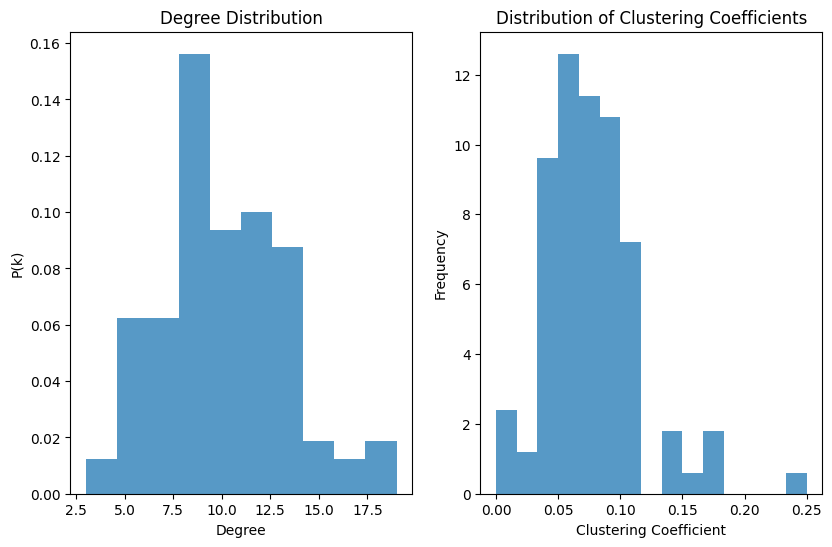

Average clustering coefficient: 0.07586122529001785


In [ ]:
# Generate Erdos-Renyi-Gilbert graph
erdos_renyi_gilbert_edges = erdos_renyi_gilbert_graph(N, p)

# Calculate and plot properties
calculate_and_plot_properties(erdos_renyi_gilbert_edges, N)

In [ ]:
# Plot the network graph
def erdos_renyi_gilbert_grapha(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for i in range(N):
        for j in range(i + 1, N):
            if np.random.rand() < p:
                G.add_edge(i, j)
    plt.figure(figsize=(8, 8))
    plt.title("Erdos-Renyi-Gilbert Graph")
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False, font_size=6, node_size=100,
            node_color='blue', edge_color='gray', alpha=0.5)
    plt.show()

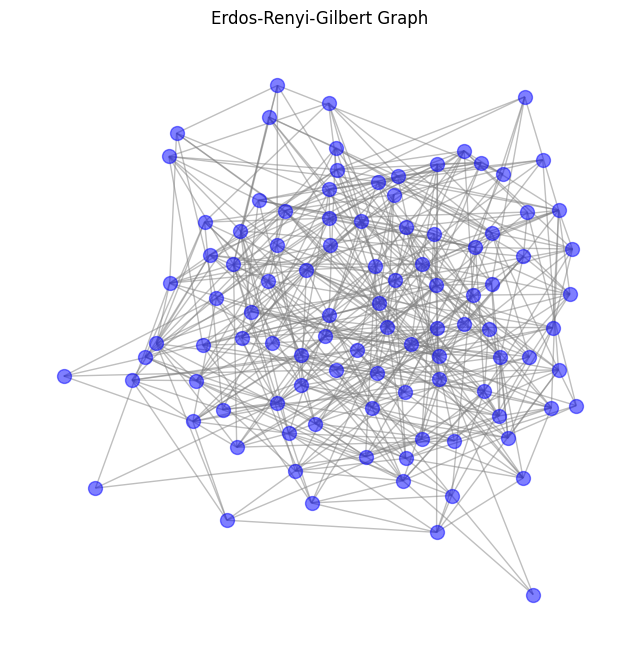

In [ ]:
# Generate and plot the network graph
erdos_renyi_gilbert_grapha(N, p)

### Watts and Strogatz model


The Watts and Strogatz model, denoted as WS(N, k, β), is a generative network model proposed by Duncan
J. Watts and Steven H. Strogatz. In this model, the network evolution begins with a regular graph of size N,
often represented as a one-dimensional ring with periodic boundary conditions. Initially, each node is
connected to its k nearest neighbors, forming a structured lattice. The parameter k determines the level of
local clustering, with higher values connecting nodes to more distant neighbors.
A crucial aspect of the model involves the rewiring process. With a probability β, each edge in the regular
lattice is rewired to a randomly chosen node. This rewiring mechanism introduces randomness into the
network structure, leading to the emergence of small-world properties. The Watts and Strogatz model
captures the trade-off between regularity and randomness, producing networks with high local clustering and
short average path lengths. It is a valuable tool for simulating complex systems where both local and global
connectivity patterns play an important role.


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def watts_strogatz_graph(N, k, beta):
    G = nx.watts_strogatz_graph(N, k, beta)
    return G

def calculate_and_plot_properties(G):

    # (a) Degree distribution P(k) and average degree <k>
    degrees = dict(G.degree())
    degree_distribution = np.bincount(list(degrees.values())) / len(G.nodes)
    average_degree = np.mean(list(degrees.values()))
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 3, 1)
    plt.hist(list(degrees.values()), bins=6, density=True, alpha=0.75)
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("P(k)")
    print(f"Average degree: {average_degree}")

    # (b) Distribution of clustering coefficients and average clustering coefficient
    clustering_coeffs = nx.clustering(G)
    avg_clustering_coeff = nx.average_clustering(G)
    plt.subplot(1, 3, 2)
    plt.hist(list(clustering_coeffs.values()), bins=8, density=True, alpha=0.75)
    plt.title("Distribution of Clustering Coefficients")
    plt.xlabel("Clustering Coefficient")
    plt.ylabel("Frequency")
    print(f"Average clustering coefficient: {avg_clustering_coeff}")

    # (c) Distribution of shortest paths, diameter, and average path length
    shortest_paths = nx.shortest_path_length(G)
    all_shortest_paths = [length for source_paths in shortest_paths for length in source_paths[1].values()]
    diameter = nx.diameter(G)
    average_path_length = nx.average_shortest_path_length(G)
    plt.subplot(1, 3, 3)
    plt.hist(all_shortest_paths, bins=8, density=True, alpha=0.75)
    plt.title("Distribution of Shortest Paths")
    plt.xlabel("Shortest Path Length")
    plt.ylabel("Frequency")
    plt.show()
    print("(c) Distribution of shortest paths, diameter, and average path length:")
    print(f"Diameter: {diameter}")
    print(f"Average Path Length: {average_path_length}")

    # Plot the network graph
    plt.figure(figsize=(8, 8))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, font_size=8, node_size=200,
            node_color='skyblue', edge_color='gray')
    plt.title("Watts-Strogatz Graph")
    plt.show()

In [ ]:
# Parameters for the Watts-Strogatz model
N = 100  # Number of nodes
k = 4  # Number of nearest neighbors
beta = 0.2  # Rewiring probability

Average degree: 4.0
Average clustering coefficient: 0.27614285714285713


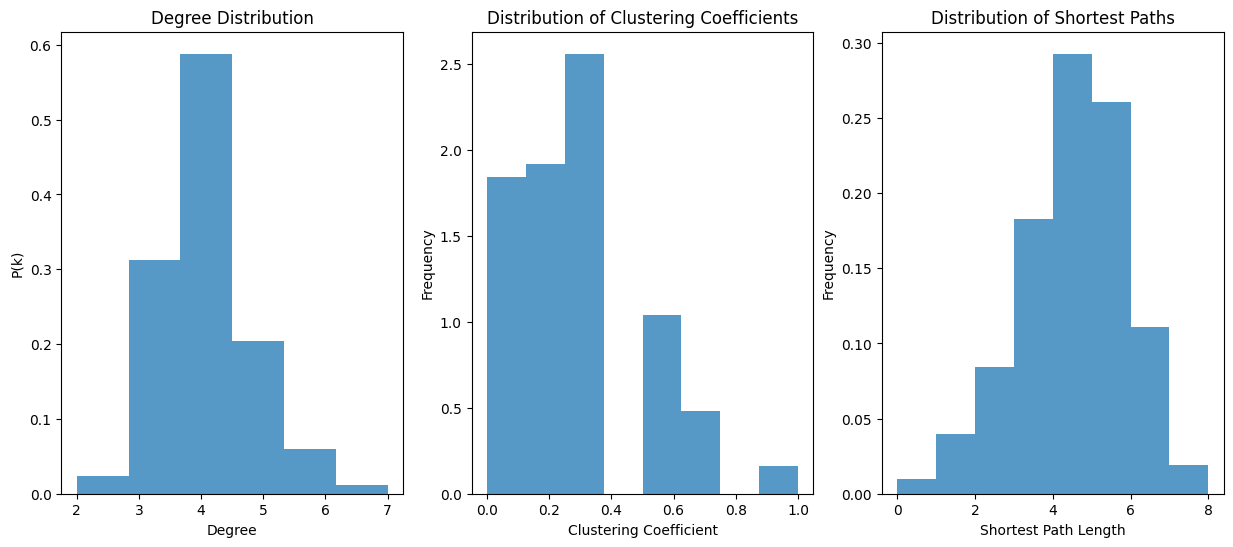

(c) Distribution of shortest paths, diameter, and average path length:
Diameter: 8
Average Path Length: 4.068888888888889


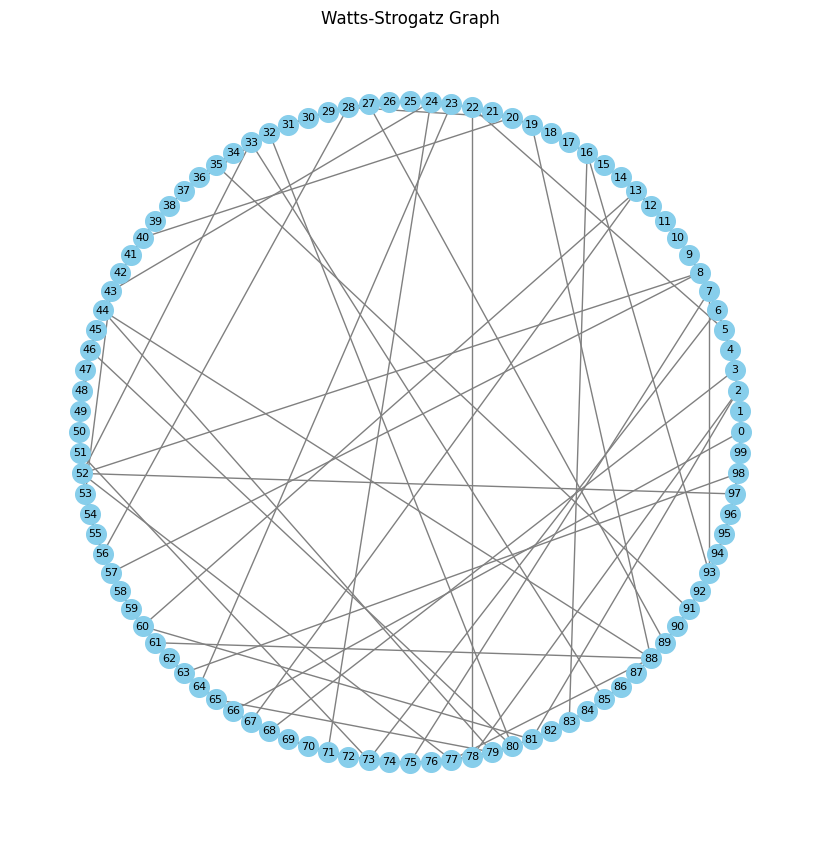

In [ ]:
# Generate Watts-Strogatz graph
watts_strogatz_graph = watts_strogatz_graph(N, k, beta)

# Calculate and plot properties
calculate_and_plot_properties(watts_strogatz_graph)

## Conclusions

*   The Erdős-Rényi model, with a fixed number of vertices (N) and a varying number of randomly
placed edges (L), exhibits a Poisson degree distribution. As the number of edges increases, the
distribution tends toward a Gaussian shape.
*   The average degree (< k >) is directly proportional to the number of edges and provides an indication
of the network's connectivity.
*   The Erdős-Rényi-Gilbert model, with a fixed number of vertices (N) and a probability of connection
(p), results in a binomial degree distribution. Lower probabilities lead to sparser networks with lower
average degrees, while higher probabilities result in denser networks with higher average degrees.
*   The Watts and Strogatz model starts with a regular graph and introduces randomness through
rewiring. The degree distribution exhibits characteristics of both regular and random networks.
*   The average degree (< k >) in Watts and Strogatz model is influenced by the initial regular structure
(k) and the rewiring probability (β).
*   The Watts and Strogatz model typically results in short average path lengths, in other models it
wasn’t possible to compare.
*   Erdős-Rényi model has low clustering coefficients.
*   Erdős-Rényi-Gilbert model shows variable clustering coefficients based on the probability of
connection.
*   Watts and Strogatz model starts with high clustering due to regular structure and decreases with
increased rewiring.